## Dataset and assignment information

The purpose of this program is to train the machine to recognize digit 1 anmd digit 5 from Digits MNIST handwriting dataset. Data is imported from Tensorflow Keras consisting of digits from zero (0) to nine (9). In this program, there are 5 hidden layers.

## Import functions and packages

In [106]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
from matplotlib import pyplot

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [107]:
# Load Digits MNIST dataset 
datasets_mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = datasets_mnist

Saving figure X_train_full_mnist


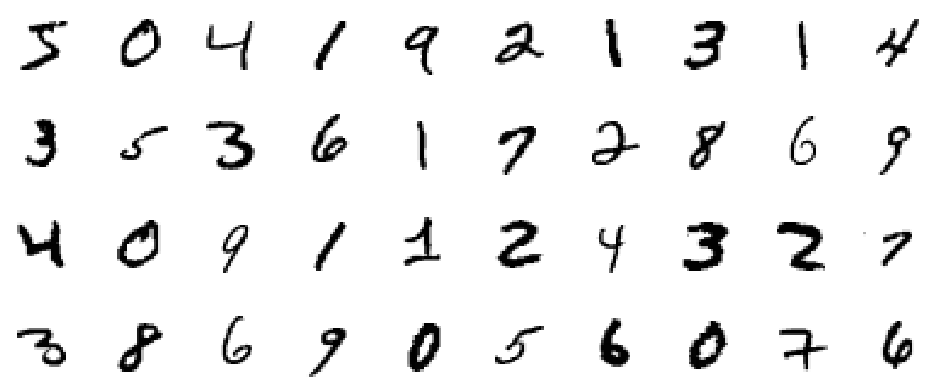

In [108]:
# Display example of the images from the X_train_full (original) dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('X_train_full_mnist', tight_layout=False)
plt.show()

In [109]:
X_train_full.shape

(60000, 28, 28)

In [110]:
# Split data into Training set, Test set and Validation set and normalize them by deviding by 255 with decimal
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Print number of examples for each dataset
print("Number of original training examples:", len(X_train))
print("Number of original validation examples:", len(X_valid))
print("Number of original test examples:", len(X_test))

Number of original training examples: 55000
Number of original validation examples: 5000
Number of original test examples: 10000


In [111]:
X_train_full.dtype # Display data typse

dtype('uint8')

In [112]:
# Filter data to keep only 1 and 5 , and convert the label y to boolean; True for 1 and False for 5
def filter_15(X, y):
    keep = (y == 1) | (y ==5)
    X, y = X[keep], y[keep]
    y = y == 1
    return X,y

In [113]:
# Split data into Training set, Test set and Validation set after getting the result from filter_15 function to only gather images with digit 1 and 5
X_train, y_train = filter_15(X_train, y_train)
X_test, y_test = filter_15(X_test, y_test)
X_test = X_test / 255.

# Print number of examples for each dataset
print("Number of original training examples:", len(X_train))
print("Number of original validation examples:", len(X_valid))
print("Number of original test examples:", len(X_test))

Number of original training examples: 11166
Number of original validation examples: 5000
Number of original test examples: 2027


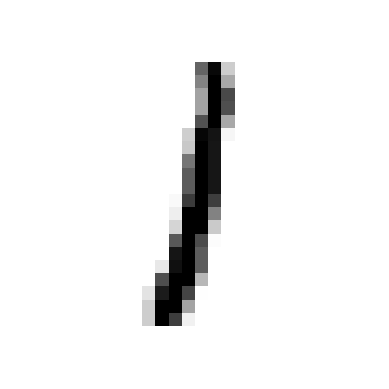

In [114]:
# Display the first element from the training set
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [115]:
X_train.shape # Get the dimensions of the training set

(11166, 28, 28)

In [116]:
y_train # show the result of the training set

array([ True,  True,  True, ..., False,  True, False])

Saving figure X_train_mnist


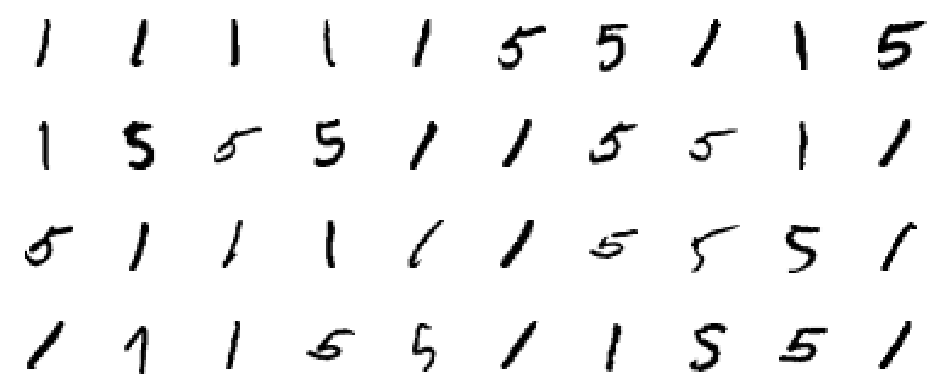

In [117]:
# Display images of the results from training dataset in 4 rows and 10 columns
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('X_train_mnist', tight_layout=False)
plt.show()

In [118]:
X_valid.shape # Get the dimensions of the validation set

(5000, 28, 28)

In [119]:
y_valid # show the result of the validation set

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

Saving figure X_valid_mnist


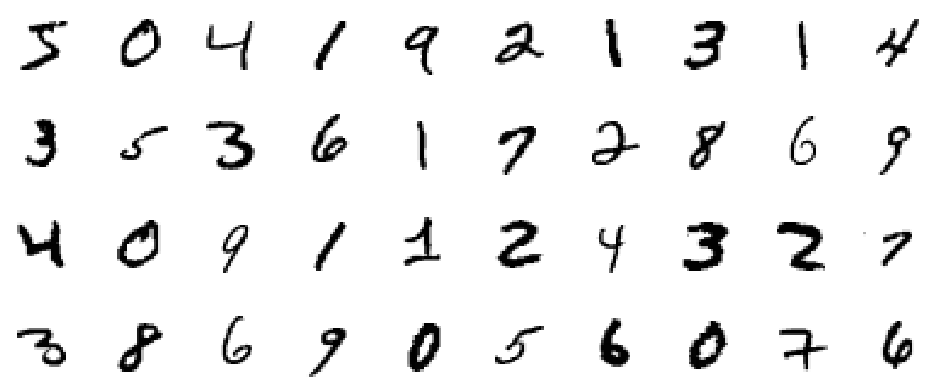

In [120]:
# Display images from validation dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_valid[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('X_valid_mnist', tight_layout=False)
plt.show()

In [121]:
X_test.shape # Get the dimensions of the test set

(2027, 28, 28)

In [122]:
y_test # show the result of the test set

array([ True,  True, False, ..., False,  True, False])

Saving figure X_test_mnist


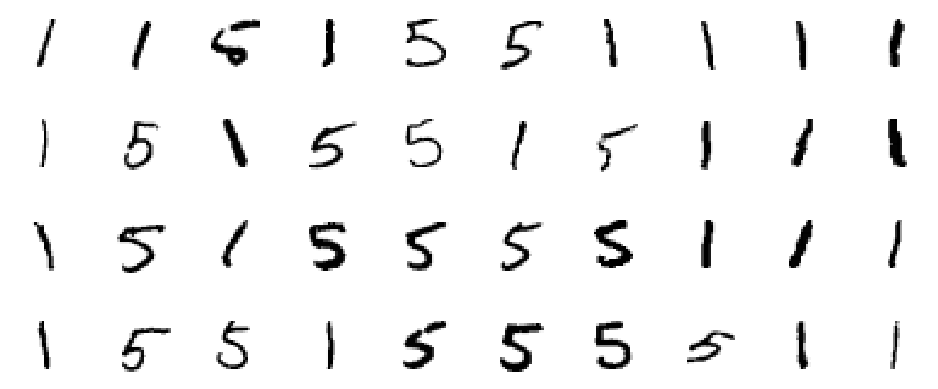

In [123]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('X_test_mnist', tight_layout=False)
plt.show()

## Building an image classification

The validation set contains 434 images, and the test set contains 892 images:

In [124]:
X_valid.shape # Get the dimensions of the validation set

(5000, 28, 28)

In [125]:
X_test.shape # Get the dimensions of the test set

(2027, 28, 28)

In [126]:
keras.backend.clear_session() # Clear previous session if any
np.random.seed(42) # Set randsome seeds
tf.random.set_seed(42) # Set random seeds

In [127]:
# Add layers to model as a list
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # Flatten layer to 2D with the dimension of 28 by 28
    keras.layers.Dense(300, activation="relu"), # Input layer with  300 neurons using ReLU activation
    keras.layers.Dense(200, activation="relu"), # Input layer with 200 neurons using ReLU activation
    keras.layers.Dense(100, activation="relu"), # Input layer with 100 neurons using ReLU activation
    keras.layers.Dense(50, activation="relu"), # Output layer with 50 neurons using Relu activation
    keras.layers.Dense(25, activation="relu"), # Output layer with 25 neurons using Relu activation
    keras.layers.Dense(10, activation="softmax") # Output layer with 10 neurons using Softmax activation
])

In [128]:
model.layers # Execute layers

In [129]:
model.summary() # Get summary of the layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 10)                2

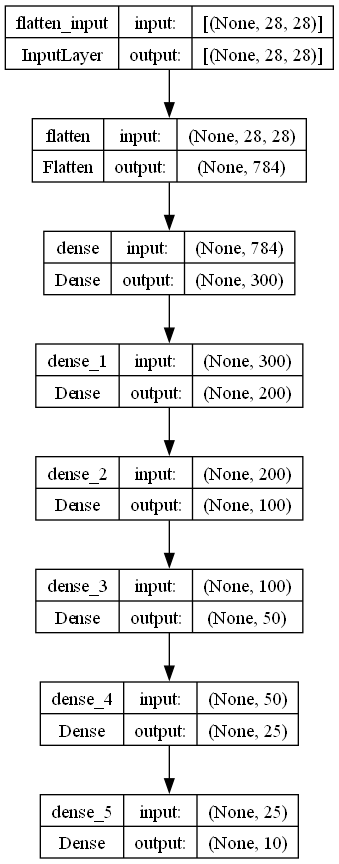

In [130]:
# Display the model's layers and how they are connected. 
keras.utils.plot_model(model, "filter_15_mnist_model.png", show_shapes=True) 

In [131]:
hidden1 = model.layers[1] # Assign dense layer (in index 1) to hidden 1
hidden1.name

'dense'

In [132]:
model.get_layer(hidden1.name) is hidden1 # Check if the hidden 1 is hidden

True

In [133]:
weights, biases = hidden1.get_weights() # Get weights and biases from hidden 1

In [134]:
weights # Display weights's results

array([[-0.01742583, -0.05033464, -0.03646021, ...,  0.00152991,
        -0.04404227,  0.04016025],
       [-0.07417084,  0.00111846, -0.01323694, ..., -0.03579552,
        -0.06860957, -0.03287557],
       [ 0.01490572, -0.03095151, -0.03701637, ...,  0.00999379,
         0.03293511, -0.0479326 ],
       ...,
       [-0.00044481, -0.04548995, -0.0314305 , ...,  0.04104149,
         0.07132317, -0.01746478],
       [ 0.06046103,  0.00794161, -0.03024732, ..., -0.05143094,
         0.03464522, -0.03579254],
       [ 0.03390373,  0.07386012, -0.05395594, ..., -0.0034688 ,
         0.06421494,  0.03791388]], dtype=float32)

In [135]:
weights.shape # Get weights dimensions of the hidden 1

(784, 300)

In [136]:
biases # Display bases's results

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [137]:
biases.shape # Get bases dimensions of the hidden 1

(300,)

## Optimization

In [138]:
"""
Set parameter to train the model, using  Stochastic Gradient Descent (SGD) as an optimizer, then 
evaluate the result using accuracy and evaluate the loss using sparse_categorical_crossentropy
"""
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy", tf.keras.metrics.CategoricalAccuracy()])

In [139]:
# Train the model on the Training set and evaluate on the validation set
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
349/349 [==============================] - 2s 4ms/step - loss: 0.2782 - accuracy: 0.9166 - categorical_accuracy: 0.5047 - val_loss: 9.4389 - val_accuracy: 0.2070 - val_categorical_accuracy: 0.7814
Epoch 2/30
349/349 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9926 - categorical_accuracy: 0.4481 - val_loss: 10.1948 - val_accuracy: 0.2076 - val_categorical_accuracy: 0.6972
Epoch 3/30
349/349 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9944 - categorical_accuracy: 0.4474 - val_loss: 10.7089 - val_accuracy: 0.2078 - val_categorical_accuracy: 0.6790
Epoch 4/30
349/349 [==============================] - 1s 4ms/step - loss: 0.0149 - accuracy: 0.9961 - categorical_accuracy: 0.4472 - val_loss: 11.2795 - val_accuracy: 0.2076 - val_categorical_accuracy: 0.7112
Epoch 5/30
349/349 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.9966 - categorical_accuracy: 0.4472 - val_loss: 11.6698 - val_accuracy

In [140]:
history.params # Display parameters related tot he traaining process

{'verbose': 1, 'epochs': 30, 'steps': 349}

In [141]:
print(history.epoch) # Display each epoch it ran

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [142]:
history.history.keys() 

dict_keys(['loss', 'accuracy', 'categorical_accuracy', 'val_loss', 'val_accuracy', 'val_categorical_accuracy'])

Saving figure keras_learning_curves_plot


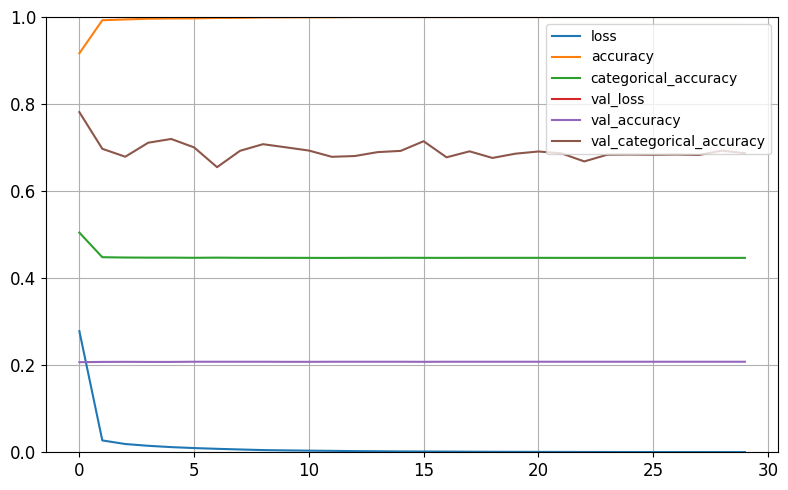

In [143]:
# Display the results of accuracy and loss from the validation set in graph plot
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [144]:
model.evaluate(X_train, y_train)

349/349 [==============================] - 1s 1ms/step - loss: 3.6161e-04 - accuracy: 1.0000 - categorical_accuracy: 0.4466


[0.0003616058675106615, 1.0, 0.44662368297576904]

In [145]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 14.4565 - accuracy: 0.2080 - categorical_accuracy: 0.6870


[14.45652961730957, 0.20800000429153442, 0.6869999766349792]

In [146]:
model.evaluate(X_test, y_test) # Evaluation the loss and accuracy on the test set

64/64 [==============================] - 0s 2ms/step - loss: 1.3339 - accuracy: 0.4401 - categorical_accuracy: 1.0000


[1.3339345455169678, 0.44005921483039856, 1.0]

In [147]:
# Predict probabilities on the first 5 data from the test set
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(4)

1/1 [==============================] - 0s 67ms/step


array([[0.2749, 0.2379, 0.0694, 0.0515, 0.0644, 0.0502, 0.0498, 0.0663,
        0.077 , 0.0587],
       [0.2732, 0.2414, 0.0694, 0.0514, 0.0641, 0.0498, 0.0493, 0.066 ,
        0.0769, 0.0585],
       [0.2975, 0.2231, 0.0673, 0.0498, 0.0638, 0.05  , 0.0498, 0.0657,
        0.0753, 0.0577],
       [0.2716, 0.2444, 0.0694, 0.0513, 0.0639, 0.0495, 0.049 , 0.0657,
        0.0769, 0.0584],
       [0.2825, 0.2303, 0.0689, 0.0512, 0.0646, 0.0505, 0.0502, 0.0665,
        0.0766, 0.0588]], dtype=float32)

In [148]:
y_pred = model.predict(X_new)
y_pred
y_pred.round(4)

1/1 [==============================] - 0s 15ms/step


array([[0.2749, 0.2379, 0.0694, 0.0515, 0.0644, 0.0502, 0.0498, 0.0663,
        0.077 , 0.0587],
       [0.2732, 0.2414, 0.0694, 0.0514, 0.0641, 0.0498, 0.0493, 0.066 ,
        0.0769, 0.0585],
       [0.2975, 0.2231, 0.0673, 0.0498, 0.0638, 0.05  , 0.0498, 0.0657,
        0.0753, 0.0577],
       [0.2716, 0.2444, 0.0694, 0.0513, 0.0639, 0.0495, 0.049 , 0.0657,
        0.0769, 0.0584],
       [0.2825, 0.2303, 0.0689, 0.0512, 0.0646, 0.0505, 0.0502, 0.0665,
        0.0766, 0.0588]], dtype=float32)

As the result shows in the graph above, the validation set is not doing as well as the trainning set. This is a problem of overfitting. For the next assignemnt, I will be working on making an imporvement on the model and test on the test set.

## Continued Optimization

In [149]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [150]:
def custom_sparse_categorical_crossentropy(y_true, y_pred):
    # Convert y_true from sparse label to one-hot encoded
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=tf.shape(y_pred)[1])
    
    # Compute the actual cross-entropy
    entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true_one_hot, logits=y_pred)

    return tf.reduce_mean(entropy)

In [151]:
"""
Set parameter to train the model, using  Stochastic Gradient Descent (SGD) as an optimizer, then 
evaluate the result using accuracy and evaluate the loss using sparse_categorical_crossentropy
"""
model.compile(loss=custom_sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=["accuracy", tf.keras.metrics.CategoricalAccuracy()])

In [152]:
from tensorflow.keras.callbacks import EarlyStopping

# Regularize validation set and stop once the model creases to improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [153]:
# Train the model on the Training set and evaluate on the validation set
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/30
349/349 [==============================] - 2s 4ms/step - loss: 1.4695 - accuracy: 0.9915 - categorical_accuracy: 0.4487 - val_loss: 2.2540 - val_accuracy: 0.2068 - val_categorical_accuracy: 0.8354
Epoch 2/30
349/349 [==============================] - 1s 4ms/step - loss: 1.4674 - accuracy: 0.9939 - categorical_accuracy: 0.4464 - val_loss: 2.2532 - val_accuracy: 0.2076 - val_categorical_accuracy: 0.7826
Epoch 3/30
349/349 [==============================] - 1s 3ms/step - loss: 1.4657 - accuracy: 0.9954 - categorical_accuracy: 0.4455 - val_loss: 2.2526 - val_accuracy: 0.2080 - val_categorical_accuracy: 0.6890
Epoch 4/30
349/349 [==============================] - 1s 4ms/step - loss: 1.4687 - accuracy: 0.9925 - categorical_accuracy: 0.4475 - val_loss: 2.2531 - val_accuracy: 0.2078 - val_categorical_accuracy: 0.7560
Epoch 5/30
349/349 [==============================] - 1s 4ms/step - loss: 1.4774 - accuracy: 0.9839 - categorical_accuracy: 0.4398 - val_loss: 2.2548 - val_accuracy: 0.

In [154]:
history.history.keys() 

dict_keys(['loss', 'accuracy', 'categorical_accuracy', 'val_loss', 'val_accuracy', 'val_categorical_accuracy'])

Saving figure keras_learning_curves_plot


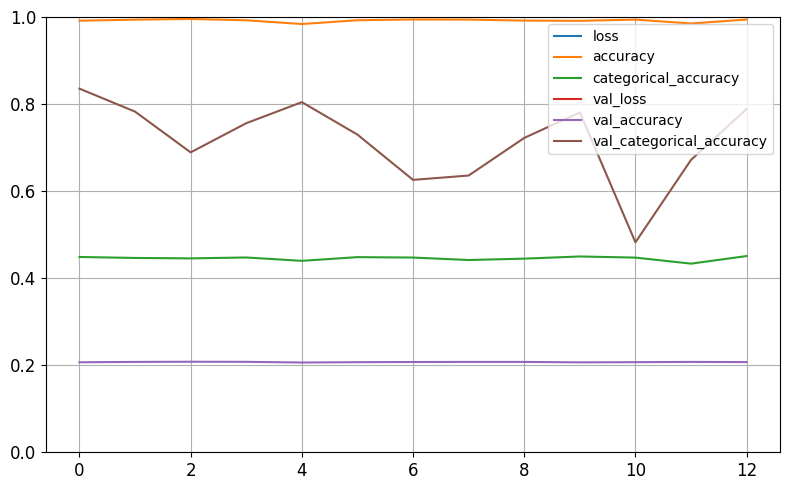

In [155]:
# Display the results of accuracy and loss from the validation set in graph plot
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [156]:
model.evaluate(X_train, y_train) # Evaluate the training set

349/349 [==============================] - 1s 1ms/step - loss: 1.4652 - accuracy: 0.9960 - categorical_accuracy: 0.4431


[1.4651541709899902, 0.9959698915481567, 0.4431309401988983]

In [157]:
model.evaluate(X_valid, y_valid) # Evaluate the training set

157/157 [==============================] - 0s 2ms/step - loss: 2.2526 - accuracy: 0.2080 - categorical_accuracy: 0.6890


[2.2526164054870605, 0.20800000429153442, 0.6890000104904175]

In [158]:
model.evaluate(X_test, y_test) # Evaluation the test set

64/64 [==============================] - 0s 2ms/step - loss: 2.0526 - accuracy: 0.4401 - categorical_accuracy: 1.0000


[2.0526344776153564, 0.44005921483039856, 1.0]

In [159]:
# Predict probabilities on the first 5 data from the test set
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(4)

1/1 [==============================] - 0s 80ms/step


array([[0.4919, 0.2032, 0.0379, 0.029 , 0.0414, 0.0408, 0.0385, 0.0418,
        0.0403, 0.0353],
       [0.4777, 0.2139, 0.0386, 0.0296, 0.0414, 0.041 , 0.0386, 0.0422,
        0.0413, 0.0356],
       [0.5585, 0.1664, 0.0334, 0.0249, 0.0391, 0.0378, 0.0353, 0.0381,
        0.0342, 0.0324],
       [0.4505, 0.2355, 0.0399, 0.0307, 0.0415, 0.0413, 0.0384, 0.0426,
        0.0435, 0.036 ],
       [0.5292, 0.1796, 0.0356, 0.027 , 0.0406, 0.0397, 0.0372, 0.0402,
        0.0369, 0.0341]], dtype=float32)

1/1 [==============================] - 0s 22ms/step


array([[0.4919, 0.2032, 0.0379, 0.029 , 0.0414, 0.0408, 0.0385, 0.0418,
        0.0403, 0.0353],
       [0.4777, 0.2139, 0.0386, 0.0296, 0.0414, 0.041 , 0.0386, 0.0422,
        0.0413, 0.0356],
       [0.5585, 0.1664, 0.0334, 0.0249, 0.0391, 0.0378, 0.0353, 0.0381,
        0.0342, 0.0324],
       [0.4505, 0.2355, 0.0399, 0.0307, 0.0415, 0.0413, 0.0384, 0.0426,
        0.0435, 0.036 ],
       [0.5292, 0.1796, 0.0356, 0.027 , 0.0406, 0.0397, 0.0372, 0.0402,
        0.0369, 0.0341]], dtype=float32)